In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
path = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(path)
df

,Unnamed: 0,specObjID,ra,dec,z,zErr,Types,d4000_n,sigmaStars,fracDeV_r,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
0,0,2795715636188178432,162.87876,16.838215,0.022297,0.000007,elliptical,1.939160,128.97870,1.000000,17.35997,15.50984,14.68634,14.30167,14.01772
1,1,2840803871343798272,240.39499,11.850668,0.053161,0.000011,elliptical,1.944695,183.85820,0.935781,19.15590,17.14306,16.24167,15.81783,15.50098
2,2,2800218136303921152,164.66952,16.900165,0.068568,0.000009,spiral,1.282932,81.20707,0.420175,18.36842,17.18698,16.64672,16.31816,16.09746
3,3,2800232155077175296,164.85617,16.979098,0.083634,0.000019,spiral,1.565293,97.63731,0.170645,18.47494,17.25055,16.64057,16.32310,16.13419
4,4,2849703318459017216,245.52298,10.278617,0.128543,0.000025,spiral,1.453489,219.17930,0.478295,19.32188,17.80865,17.02585,16.56203,16.39108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525335,583519,2795713986920736768,162.43700,17.284938,0.056785,0.000006,spiral,1.123235,98.59753,0.000000,19.50647,17.86611,17.53326,17.20054,17.99106
525336,583520,2916209471627749376,155.78431,15.811398,0.145377,0.000023,elliptical,1.496544,148.20890,1.000000,20.09706,18.75447,17.76428,17.33186,17.03715
525337,583522,2920722966893324288,159.56049,16.508320,0.178770,0.000020,spiral,1.549078,91.99490,0.407970,19.59916,18.35870,17.55004,17.16154,17.01065
525338,583523,2792375044968310784,161.67263,16.703673,0.056509,0.000008,spiral,1.398121,83.41415,0.282227,19.66740,18.04996,17.17682,16.70945,16.39195


In [5]:
# loc ต้องใช้ชื่อแถว,คอลัมน์
# iloc ใช้แค่ตัวเลขตำแหน่ง
rs = np.array(df.loc[:, 'z'])
fd = np.array(df.loc[:, 'fracDeV_r'])
d4000_n = np.array(df.loc[:, 'd4000_n'])
sigmastar = np.array(df.loc[:, 'sigmaStars'])
u = np.array(df.loc[:, 'petroMag_u'])
g = np.array(df.loc[:, 'petroMag_g'])
r = np.array(df.loc[:, 'petroMag_r'])
i = np.array(df.loc[:, 'petroMag_i'])
z = np.array(df.loc[:, 'petroMag_z'])

ug = u-g
ur = u-r
ui = u-i
uz = u-z
gr = g-r
gi = g-i
gz = g-z
ri = r-i
rz = r-z
iz = i-z

Types = df.loc[:, 'Types']
Types_ = np.array(Types)
types = Types.apply(lambda v: v.replace('elliptical', '0').replace('spiral', '1')).astype(int)
y = np.array(types)


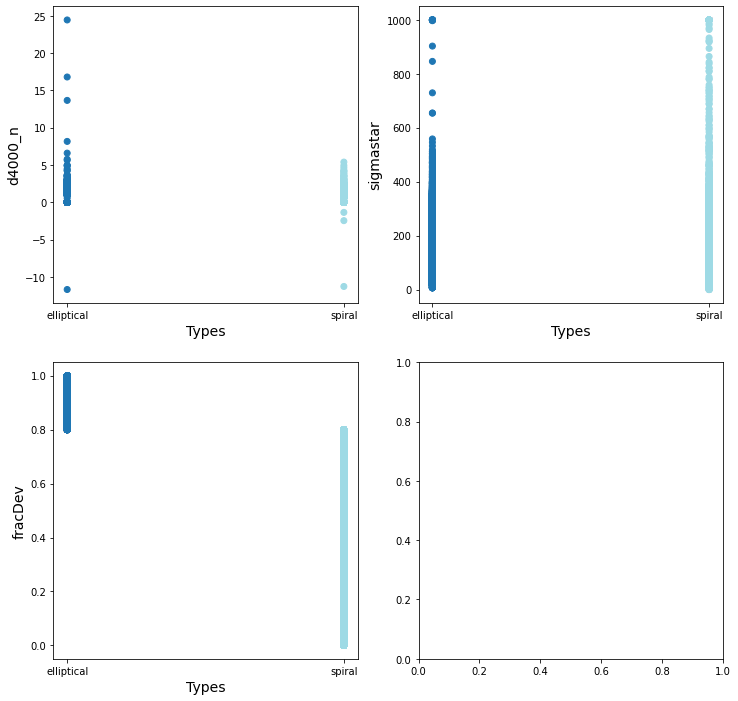

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

def plot_scat1(p1, p2, X, Y, x_name, y_name):
    ax[p1, p2].scatter(X, Y, c=y, cmap='tab20')
    ax[p1, p2].set_xlabel(str(x_name), fontsize='14')
    ax[p1, p2].set_ylabel(str(y_name), fontsize='14')

plot_scat1(0, 0, Types_, d4000_n, 'Types', 'd4000_n')
plot_scat1(0, 1, Types_, sigmastar, 'Types', 'sigmastar')
plot_scat1(1, 0, Types_, fd, 'Types', 'fracDev')


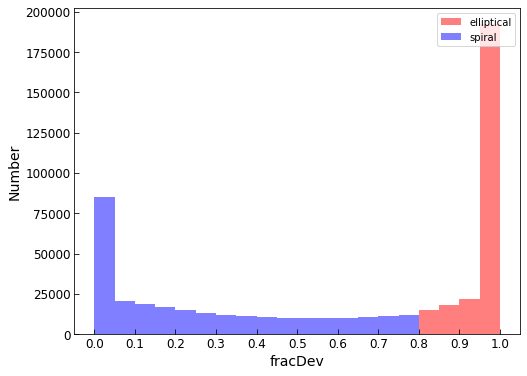

In [18]:
fde = df['fracDeV_r'].loc[df['Types']=='elliptical']
fds = df['fracDeV_r'].loc[df['Types']=='spiral']

plt.figure(figsize=(8, 6), facecolor='none')
xlim = [-0.05, 1.05]  # ความยาวแกน
xticks = np.arange(0, 1.1, 0.1)  # ตัวเลขแกนที่โชว์
plt.gca(xlim=xlim, xticks=xticks)


plt.hist(fde, bins=np.arange(0, 1.05, 0.05), color='red', alpha=0.5, label='elliptical')
plt.hist(fds, bins=np.arange(0, 1.05, 0.05), color='blue', alpha=0.5, label='spiral')

plt.xlabel("fracDev", size=14)
plt.ylabel("Number", size=14)
plt.legend(loc='upper right')

plt.tick_params(which='major', direction='in', length=5, labelsize='12')

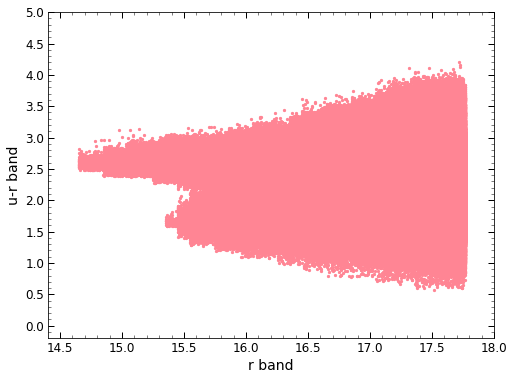

In [6]:
plt.figure(figsize=(8, 6), facecolor='none')  # size กราฟ & สีข้างนอก
xlim = [14.4, 18]  # ขอบเขตของตัวเลขแกน
xticks = np.linspace(14.5, 18, 8)  # ขอบเขตของแกนที่โชว์
ylim = [-0.2, 5]
yticks = np.linspace(0, 5, 11)
plt.gca(xlim=xlim, xticks=xticks, ylim=ylim, yticks=yticks)

# scatter=กราฟกระจาย , c=การเปลี่ยนสีของจุด , alpha=ความจางของจุด , s=ขนาดของจุด
plt.scatter(r, ur, c='#ff8594', alpha=1, s=5)

plt.xlabel('r band', fontsize='14')  # ชื่อแกน x
plt.ylabel('u-r band', fontsize='14')  # ชื่อแกน y
plt.minorticks_on()  # ขีดย่อย
plt.tick_params(which='both', labelsize='12',
                direction='in', top='1', right='1')
plt.tick_params(which='major',  length=6, width=1)
plt.tick_params(which='minor',  length=3, width=0.5)


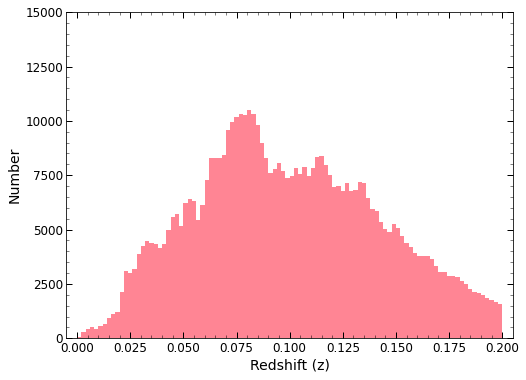

In [7]:
plt.figure(figsize=(8, 6), facecolor='none')
xlim = [-0.005, 0.205]
xticks = np.linspace(0, 0.2, 9)
ylim = [0, 15000]
yticks = np.linspace(0, 15000, 7)
plt.gca(xlim=xlim, xticks=xticks, ylim=ylim, yticks=yticks)

plt.hist(rs.astype('float'), bins=100, color='#ff8594')  # bins=แบ่งเป็นกี่ช่อง

plt.xlabel('Redshift (z)', fontsize='14')
plt.ylabel('Number', fontsize='14')
plt.minorticks_on()
plt.tick_params(which='both', labelsize='12',
                direction='in', top='1', right='1')
plt.tick_params(which='major',  length=6, width=1)
plt.tick_params(which='minor',  length=3, width=0.5)


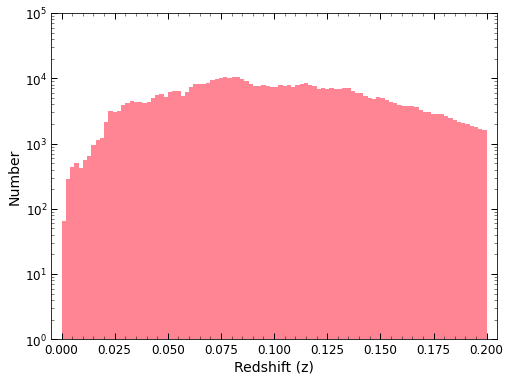

In [8]:
plt.figure(figsize=(8, 6), facecolor='none')
xlim = [-0.005, 0.205]
xticks = np.linspace(0, 0.2, 9)
ylim = [1, 100000]
yticks = np.linspace(1, 100000)
plt.gca(xlim=xlim, xticks=xticks, ylim=ylim, yticks=yticks)

plt.hist(rs.astype('float'), bins=100, color='#ff8594')
plt.yscale('log')

plt.xlabel('Redshift (z)', fontsize='14')
plt.ylabel('Number', fontsize='14')
plt.minorticks_on()
plt.tick_params(which='both', labelsize='12',
                direction='in', top='1', right='1')
plt.tick_params(which='major',  length=6, width=1)
plt.tick_params(which='minor',  length=3, width=0.5)


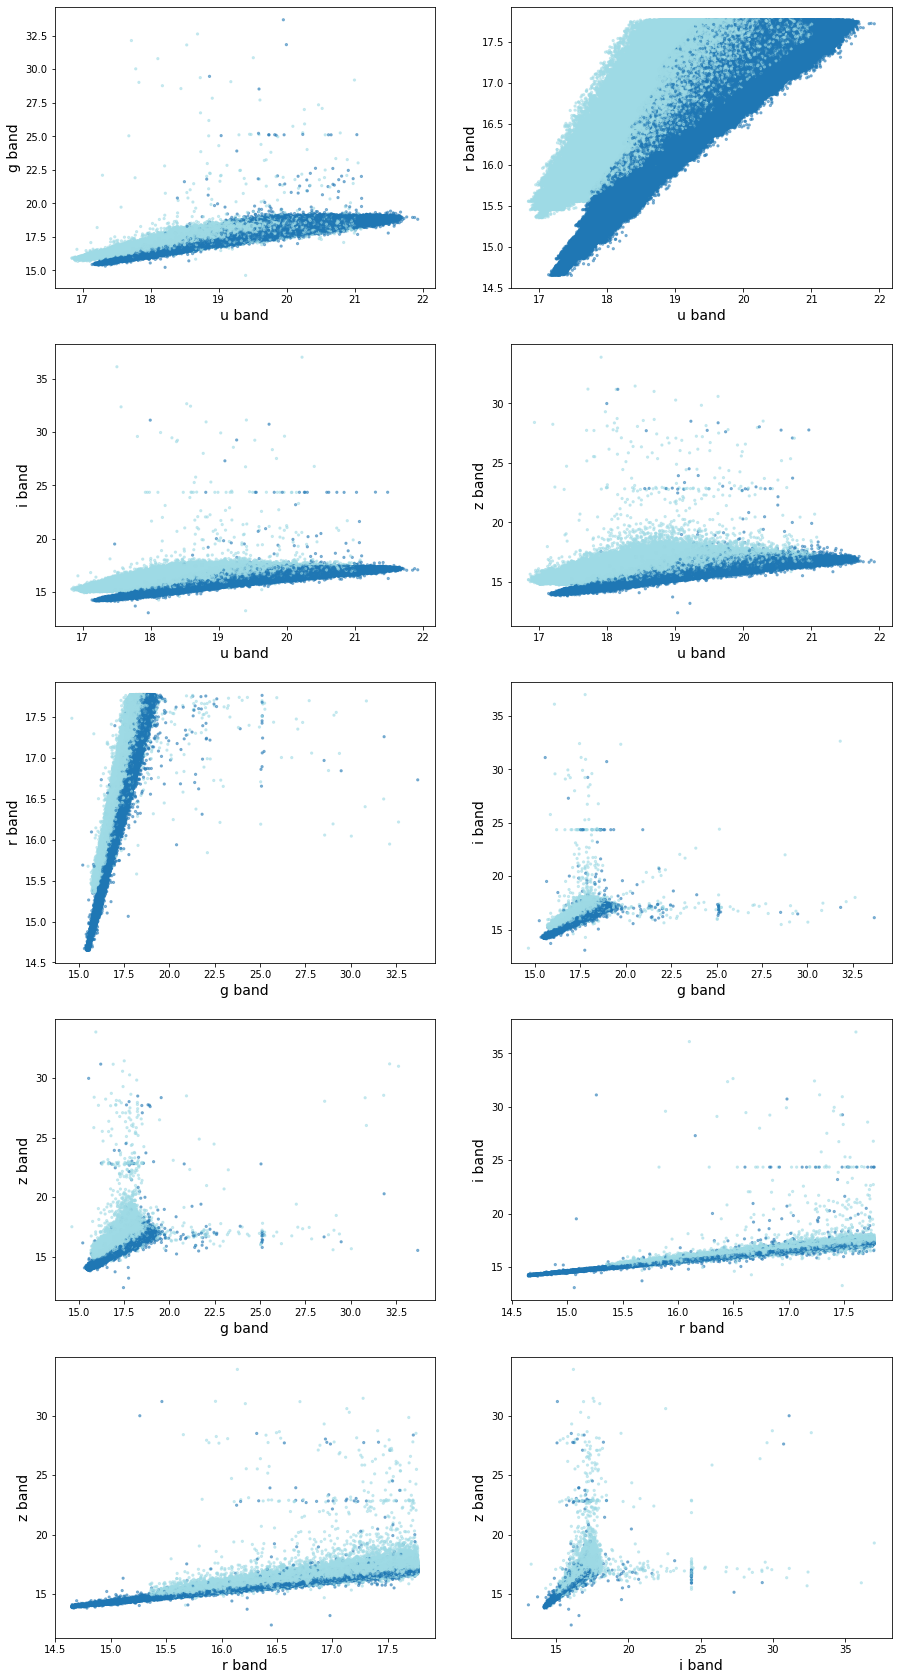

In [19]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

def plot_scat(p1, p2, X, Y, x_name, y_name):
    ax[p1, p2].scatter(X, Y, c=y, cmap='tab20', alpha=0.5, s=5)
    ax[p1, p2].set_xlabel(str(x_name) + ' band', fontsize='14')
    ax[p1, p2].set_ylabel(str(y_name) + ' band', fontsize='14')

plot_scat(0, 0, u, g, 'u', 'g')
plot_scat(0, 1, u, r, 'u', 'r')
plot_scat(1, 0, u, i, 'u', 'i')
plot_scat(1, 1, u, z, 'u', 'z')
plot_scat(2, 0, g, r, 'g', 'r')
plot_scat(2, 1, g, i, 'g', 'i')
plot_scat(3, 0, g, z, 'g', 'z')
plot_scat(3, 1, r, i, 'r', 'i')
plot_scat(4, 0, r, z, 'r', 'z')
plot_scat(4, 1, i, z, 'i', 'z')

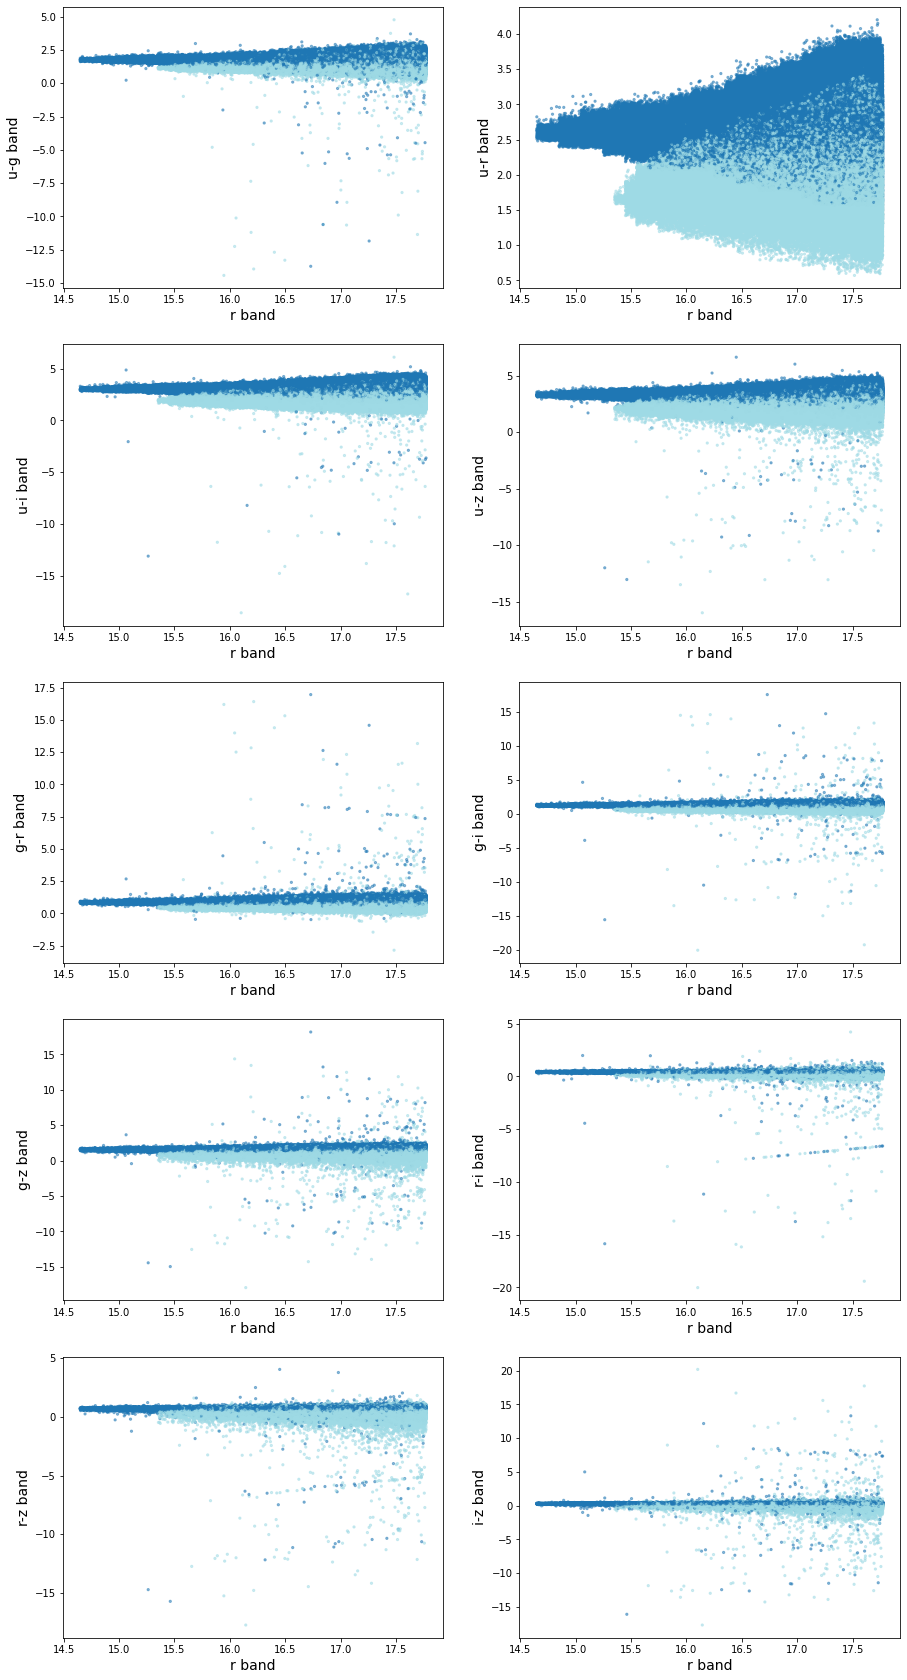

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

plot_scat(0, 0, r, ug, 'r', 'u-g')
plot_scat(0, 1, r, ur, 'r', 'u-r')
plot_scat(1, 0, r, ui, 'r', 'u-i')
plot_scat(1, 1, r, uz, 'r', 'u-z')
plot_scat(2, 0, r, gr, 'r', 'g-r')
plot_scat(2, 1, r, gi, 'r', 'g-i')
plot_scat(3, 0, r, gz, 'r', 'g-z')
plot_scat(3, 1, r, ri, 'r', 'r-i')
plot_scat(4, 0, r, rz, 'r', 'r-z')
plot_scat(4, 1, r, iz, 'r', 'i-z')


In [47]:
def plot_hist(p1, p2, X, Xname, bins):
    ax[p1, p2].hist(X, bins=bins, color='#77CEF1')  # bins=แบ่งเป็นกี่ช่อง
    
    ax[p1, p2].set_yscale('log')

    ax[p1, p2].set_xlabel(Xname, fontsize='14')
    ax[p1, p2].set_ylabel('Number', fontsize='14')


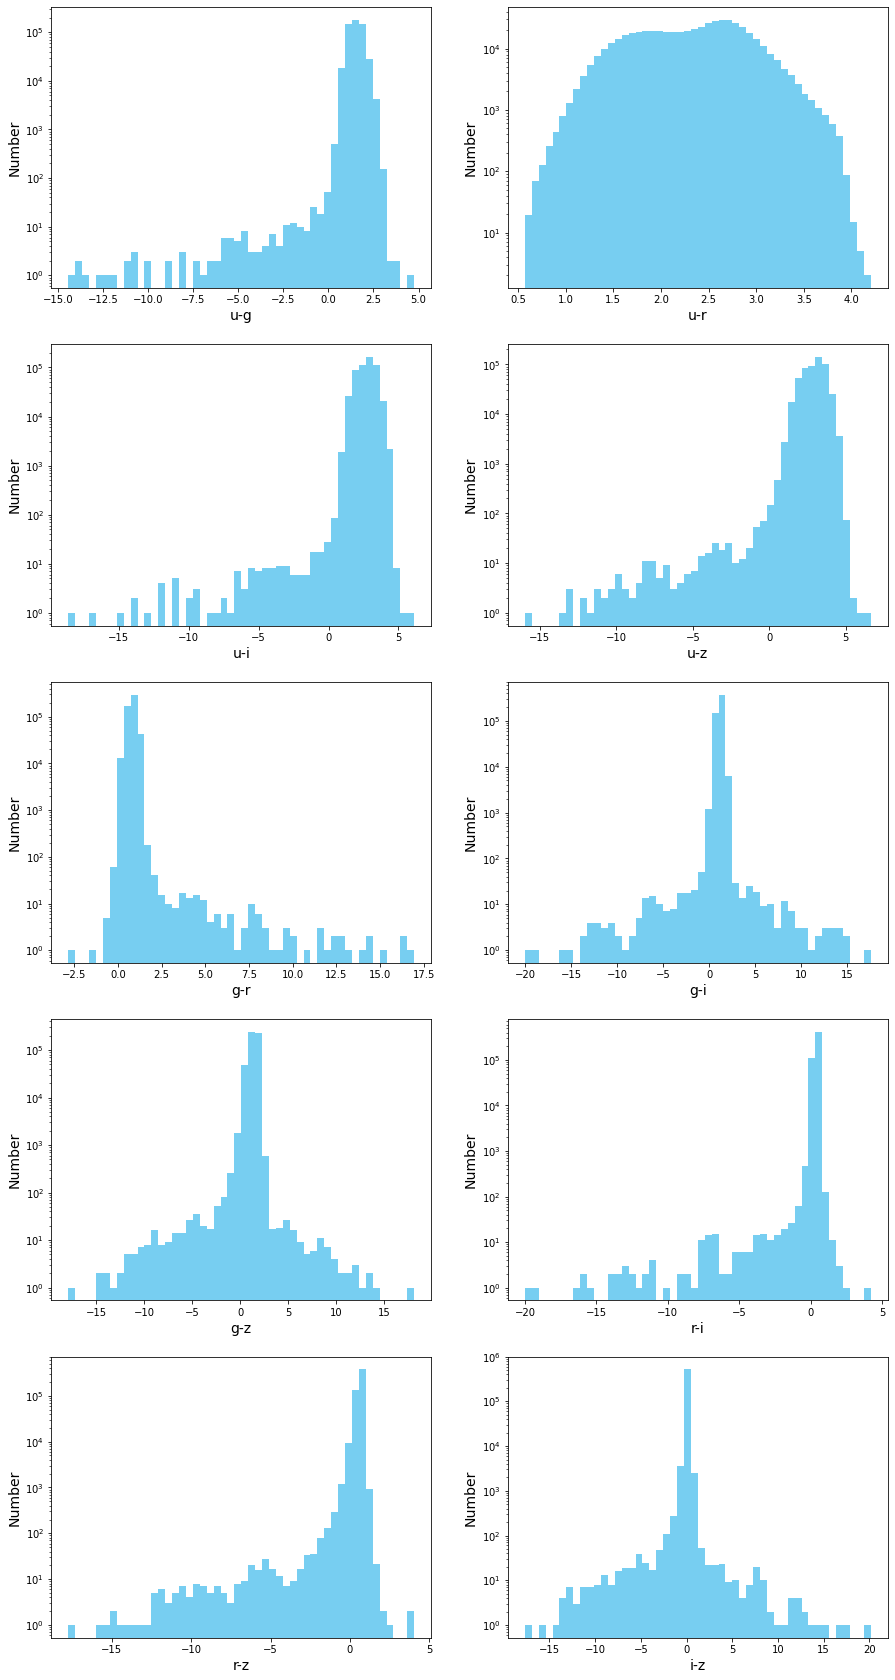

In [48]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

plot_hist(0, 0, ug, 'u-g', 50)
plot_hist(0, 1, ur, 'u-r', 50)
plot_hist(1, 0, ui, 'u-i', 50)
plot_hist(1, 1, uz, 'u-z', 50)
plot_hist(2, 0, gr, 'g-r', 50)
plot_hist(2, 1, gi, 'g-i', 50)
plot_hist(3, 0, gz, 'g-z', 50)
plot_hist(3, 1, ri, 'r-i', 50)
plot_hist(4, 0, rz, 'r-z', 50)
plot_hist(4, 1, iz, 'i-z', 50)